## Libraries

In [278]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf

## Functions

In [279]:
def daySignal(day_change):
    if day_change > 0:
        return 1
    elif day_change < 0:
        return -1
    else:
        return 0

def addDateParts(df):
    df['day_of_year'] = df.index.day
    df['day_of_week'] = df.index.dayofweek
    df['week'] = df.index.week
    df['month'] = df.index.month
    return df

## Get Data

In [280]:
#define the ticker symbol
tickerSymbol = 'MSFT'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1D', start='2017-1-1', end='2023-1-13')

# Some calculated variables
tickerDf['day_change'] = tickerDf['Close'] - tickerDf['Open']
tickerDf['day_change_pct'] = (tickerDf['day_change'] / tickerDf['Open']) * 100
tickerDf['day_change_signal'] = tickerDf['day_change'].apply(daySignal)

# Lagging close, high and low by one day
for feature in ['Close', 'High', 'Low']:
    tickerDf[f"{feature}_lag1"] = tickerDf[feature].shift(1).bfill() 

# Adding date features
tickerDf = addDateParts(tickerDf)

#see your data
tickerDf.head(5)

C:\Users\steph\AppData\Local\Temp\ipykernel_5384\3779007080.py:12: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,Open,High,Low,Close,Volume,Dividends,Stock Splits,day_change,day_change_pct,day_change_signal,Close_lag1,High_lag1,Low_lag1,day_of_year,day_of_week,week,month
Date,,,,,,,,,,,,,,,,,
2017-01-03 00:00:00-05:00,57.838810,57.884867,57.230854,57.645370,20694100,0.0,0.0,-0.193440,-0.334447,-1,57.645370,57.884867,57.230854,3,1,1,1
2017-01-04 00:00:00-05:00,57.553258,57.801968,57.221644,57.387451,21340000,0.0,0.0,-0.165807,-0.288093,-1,57.645370,57.884867,57.230854,4,2,1,1
2017-01-05 00:00:00-05:00,57.286124,57.719065,57.138741,57.387451,24876000,0.0,0.0,0.101327,0.176878,1,57.387451,57.801968,57.221644,5,3,1,1
2017-01-06 00:00:00-05:00,57.387452,58.170429,57.147956,57.884872,19922900,0.0,0.0,0.497420,0.866775,1,57.387451,57.719065,57.138741,6,4,1,1
2017-01-09 00:00:00-05:00,57.811182,58.105952,57.608532,57.700645,20382700,0.0,0.0,-0.110537,-0.191203,-1,57.884872,58.170429,57.147956,9,0,2,1


In [281]:
tickerDf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1518 entries, 2017-01-03 00:00:00-05:00 to 2023-01-12 00:00:00-05:00
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               1518 non-null   float64
 1   High               1518 non-null   float64
 2   Low                1518 non-null   float64
 3   Close              1518 non-null   float64
 4   Volume             1518 non-null   int64  
 5   Dividends          1518 non-null   float64
 6   Stock Splits       1518 non-null   float64
 7   day_change         1518 non-null   float64
 8   day_change_pct     1518 non-null   float64
 9   day_change_signal  1518 non-null   int64  
 10  Close_lag1         1518 non-null   float64
 11  High_lag1          1518 non-null   float64
 12  Low_lag1           1518 non-null   float64
 13  day_of_year        1518 non-null   int64  
 14  day_of_week        1518 non-null   int64  
 15  week               1518 

## EDA

### Descriptive statistics

In [282]:
tickerDf.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1518.0,1.699785e+02,8.274119e+01,5.728612e+01,9.635903e+01,1.489470e+02,2.433916e+02,3.414208e+02
High,1518.0,1.717172e+02,8.366872e+01,5.771906e+01,9.718099e+01,1.530205e+02,2.456753e+02,3.464239e+02
Low,1518.0,1.681324e+02,8.174320e+01,5.706505e+01,9.541241e+01,1.477611e+02,2.406761e+02,3.390233e+02
Close,1518.0,1.700086e+02,8.274444e+01,5.738745e+01,9.642319e+01,1.507952e+02,2.433784e+02,3.399248e+02
Volume,1518.0,2.894869e+07,1.254223e+07,7.425600e+06,2.090828e+07,2.586475e+07,3.326102e+07,1.112421e+08
Dividends,1518.0,7.990777e-03,6.396157e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.800000e-01
Stock Splits,1518.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
day_change,1518.0,3.017711e-02,2.802268e+00,-1.552455e+01,-1.009312e+00,1.024580e-01,1.119345e+00,2.192024e+01
day_change_pct,1518.0,2.779145e-02,1.403093e+00,-5.924653e+00,-6.753313e-01,8.814980e-02,7.919621e-01,8.102450e+00
day_change_signal,1518.0,7.773386e-02,9.959799e-01,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Charting

### Profit/loss

<AxesSubplot: title={'center': 'Number of days positive or negative change'}, ylabel='Frequency'>

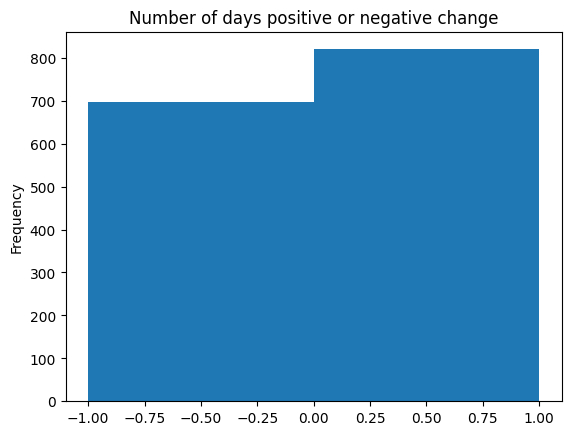

In [283]:
tickerDf['day_change_signal'].plot.hist(bins=2, title='Number of days positive or negative change')

<AxesSubplot: xlabel='Date'>

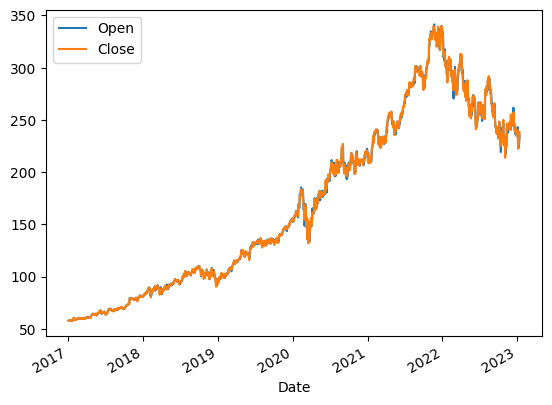

In [284]:
tickerDf[['Open', 'Close']].plot()

<AxesSubplot: xlabel='Date'>

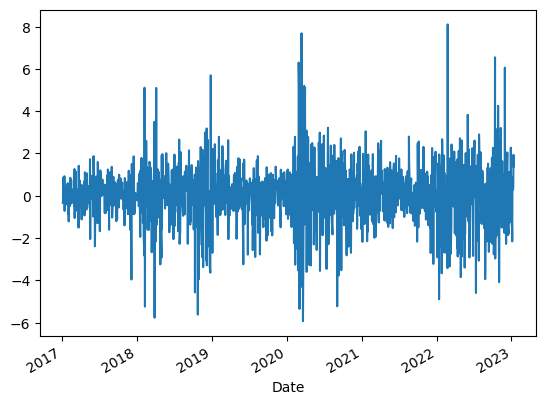

In [285]:
tickerDf['day_change_pct'].plot()

## Data prep

### Feature selection

We will attempt to predict signal based only on open price and close from previous day

In [286]:
X = tickerDf[['Open', 'Close_lag1', 'day_of_year', 'day_of_week', 'week', 'month']]
y = tickerDf['day_change_signal']

### Train/test splt

In [287]:
split = X.index.max() -dt.timedelta(days=1*365)

X_train = X[X.index < split]
y_train = y[y.index < split]
X_test = X[X.index >= split]
y_test = y[y.index >= split]

In [288]:
print(f"The shape of the training data is {X_train.shape} features and {y_train.shape}")
print("--------------------------")
print(f"The shape of the testing data is {X_test.shape} features and {y_test.shape}")

The shape of the training data is (1266, 6) features and (1266,)
--------------------------
The shape of the testing data is (252, 6) features and (252,)


### Check class balance and encode label

In [289]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train_enc = pd.Series(le.fit_transform(y_train))
y_test_enc = pd.Series(le.transform(y_test))

In [290]:
y_train_enc.value_counts(normalize=True)

2    0.539494
0    0.458136
1    0.002370
dtype: float64

## Modelling

In [291]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import r2_score, accuracy_score, classification_report, roc_auc_score, recall_score, precision_score, f1_score, cohen_kappa_score

In [296]:
perf_dict = dict()
model_dict = {
    'logr_clf':LogisticRegression(random_state=0),
    'svc_clf':SVC(gamma='auto'), 
}

In [297]:
for i in model_dict:
    print(i)

logr_clf
svc_clf


In [298]:
def logPerf(y_pred, y_proba, y_test):

    # Log performance metrics
    perf_dict = {
        'accuracy': accuracy_score(y_test, y_pred),
        'auc': roc_auc_score(y_test, y_proba, multi_class='ovr'),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        'kappa': cohen_kappa_score(y_test, y_pred)
    }

    ret_dict = {
        'y_pred': y_pred,
        'y_proba':y_proba,
        'perf_results': perf_dict
    }

    return ret_dict

In [299]:
for clf in model_dict:
    print(clf)
    # Define classifer
    clf = model_dict[i].fit(X_train, y_train_enc)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)
    perf_dict[clf] = logPerf(y_pred, y_proba, X_test)

logr_clf


AttributeError: predict_proba is not available when  probability=False

In [276]:
model_name = 'logr_clf'

# Define classifer
clf = LogisticRegression(random_state=0).fit(X_train, y_train_enc)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

# Log performance metrics
perf_dict[model_name] = {
    'accuracy': accuracy_score(y_test_enc, y_pred),
    'auc': roc_auc_score(y_test_enc, y_proba, multi_class='ovr'),
    'precision': precision_score(y_test_enc, y_pred, average='weighted'),
    'recall': recall_score(y_test_enc, y_pred, average='weighted'),
    'f1': f1_score(y_test_enc, y_pred, average='weighted'),
    'kappa': cohen_kappa_score(y_test_enc, y_pred)
}

c:\Users\steph\virtual_environments\tsvenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\steph\virtual_environments\tsvenv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [224]:
pd.DataFrame(perf_dict).T

,accuracy,auc,f1,kappa,precision,recall
logr_clf,0.519841,0.384198,0.502981,0.022786,0.509406,0.519841
